In [19]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#观察不同正则化项的区别
data = load_breast_cancer()
X = data.data
y = data.target

In [21]:
X.shape
y.shape

(569,)

In [22]:
l1 = LR(penalty='l1', C=0.5, solver='liblinear', max_iter=1000)
l2 = LR(penalty='l2', C=0.5, solver='liblinear', max_iter=1000)

l1.fit(X, y)
l2.fit(X, y)


LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')

In [23]:
l1.coef_

array([[ 4.00610087,  0.0320813 , -0.1378638 , -0.01623609,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50475949,  0.        , -0.07126699,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24594582, -0.12867061, -0.01439864,  0.        ,
         0.        , -2.03605971,  0.        ,  0.        ,  0.        ]])

In [24]:
l2.coef_

array([[ 1.61520501e+00,  1.03165052e-01,  4.89949805e-02,
        -4.54506240e-03, -9.48008257e-02, -3.01421093e-01,
        -4.56859957e-01, -2.23258616e-01, -1.36553746e-01,
        -1.93906450e-02,  1.51864035e-02,  8.84898752e-01,
         1.16165541e-01, -9.44763174e-02, -9.89655585e-03,
        -2.29726134e-02, -5.65958341e-02, -2.71050955e-02,
        -2.78527986e-02,  3.23035311e-04,  1.25588950e+00,
        -3.02228839e-01, -1.72470649e-01, -2.21057137e-02,
        -1.74443696e-01, -8.78236006e-01, -1.16396034e+00,
        -4.29422377e-01, -4.23200361e-01, -8.69294106e-02]])

In [25]:
#划分训练集和测试集
X_trian, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.3)

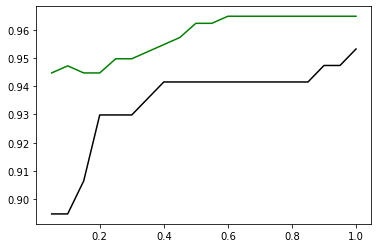

In [28]:
#不同的C值对训练集和测试集精度的影响
l1_trian = []
l2 = []
l1_test = []

for i in np.linspace(0.05, 2, num=20):
	l1 = LR(penalty='l1', C=i, solver='liblinear', max_iter=1000)
	l1.fit(X_trian, y_trian)

	l1_trian.append(accuracy_score(y_true=y_trian, y_pred=l1.predict(X_trian)))
	l1_test.append(accuracy_score(y_true=y_test, y_pred=l1.predict(X_test)))

#画学习曲线
graph = [l1_trian, l1_test]
color = ['green', 'black']
plt.figure()
for i in range(2):
	plt.plot(np.linspace(0.05, 2, num=20), graph[i], color[i])
plt.show()
